In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.drop('Id',axis=1,inplace=True)

In [ ]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
xtest

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

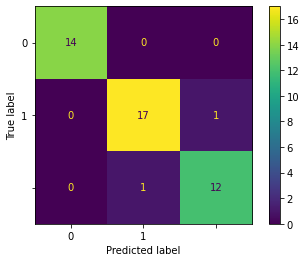

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
cm=confusion_matrix(ytest,ypred)
label=[0,1]
cmd=ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [ ]:
score=accuracy_score(ytest,ypred)
score

0.9555555555555556

In [ ]:
report=classification_report(ytest,ypred)
report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        14\nIris-versicolor       0.94      0.94      0.94        18\n Iris-virginica       0.92      0.92      0.92        13\n\n       accuracy                           0.96        45\n      macro avg       0.96      0.96      0.96        45\n   weighted avg       0.96      0.96      0.96        45\n'

[Text(0.4, 0.9, 'PetalLengthCm <= -0.64\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-versicolor'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'PetalWidthCm <= 0.59\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]\nclass = Iris-versicolor'),
 Text(0.2, 0.5, 'PetalLengthCm <= 0.709\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-virginica'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-virginica'),
 Text(0.3, 0.3, 'SepalLengthCm <= 0.297\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-versicolor'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'PetalLengthCm <= 0.625\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]\nclass = Iris-versicolor'),
 Text(0.7, 0.3, 'SepalWidthCm <= 0.161\nentr

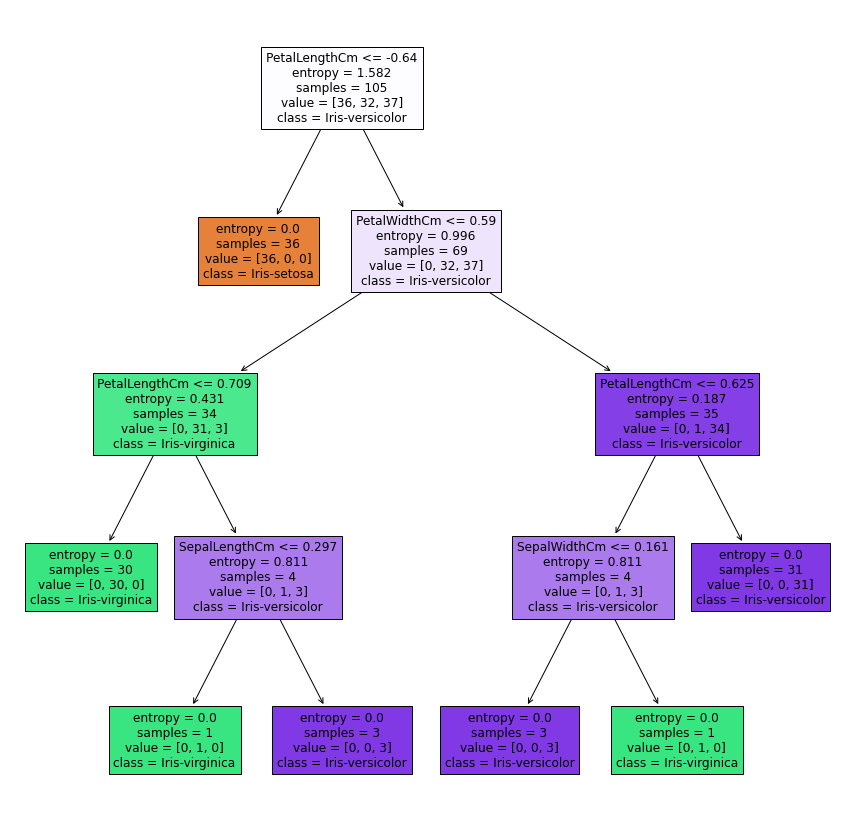

In [ ]:
#for ploting a tree :

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm',],class_names=['Iris-setosa','Iris-virginica','Iris-versicolor'],filled=True)